In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
files.upload()

Saving monthly_sales.npy to monthly_sales.npy


{'monthly_sales.npy': b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<i8\', \'fortran_order\': False, \'shape\': (12, 3), }                                                         \n&\x10\x00\x00\x00\x00\x00\x00u]\x00\x00\x00\x00\x00\x00\xd1!\x00\x00\x00\x00\x00\x00\x14\x10\x00\x00\x00\x00\x00\x00C]\x00\x00\x00\x00\x00\x00\xb6#\x00\x00\x00\x00\x00\x00A\x12\x00\x00\x00\x00\x00\x00=j\x00\x00\x00\x00\x00\x00\x95)\x00\x00\x00\x00\x00\x00\xe4\x11\x00\x00\x00\x00\x00\x00%d\x00\x00\x00\x00\x00\x00\xd8(\x00\x00\x00\x00\x00\x00\xf5\x13\x00\x00\x00\x00\x00\x00[m\x00\x00\x00\x00\x00\x00#,\x00\x00\x00\x00\x00\x00\x93\x13\x00\x00\x00\x00\x00\x00\x1bk\x00\x00\x00\x00\x00\x00\x81)\x00\x00\x00\x00\x00\x00}\x14\x00\x00\x00\x00\x00\x00\xa9j\x00\x00\x00\x00\x00\x00\x86)\x00\x00\x00\x00\x00\x00\x96\x14\x00\x00\x00\x00\x00\x00pl\x00\x00\x00\x00\x00\x00\x1e-\x00\x00\x00\x00\x00\x00H\x12\x00\x00\x00\x00\x00\x00\x9ca\x00\x00\x00\x00\x00\x00"&\x00\x00\x00\x00\x00\x001\x13\x00\x00\x00\x00\x00\x00\xcad\x00\x00\x00\x00\x0

In [3]:
monthly_sales = np.load("monthly_sales.npy")
print(monthly_sales)

[[ 4134 23925  8657]
 [ 4116 23875  9142]
 [ 4673 27197 10645]
 [ 4580 25637 10456]
 [ 5109 27995 11299]
 [ 5011 27419 10625]
 [ 5245 27305 10630]
 [ 5270 27760 11550]
 [ 4680 24988  9762]
 [ 4913 25802 10456]
 [ 5312 25405 13401]
 [ 6630 27797 18403]]


In [6]:
monthly_industry_sales = monthly_sales.sum(axis=1, keepdims = True)
print(monthly_industry_sales)

[[36716]
 [37133]
 [42515]
 [40673]
 [44403]
 [43055]
 [43180]
 [44580]
 [39430]
 [41171]
 [44118]
 [52830]]


In [7]:
monthly_sales_total = np.concatenate((monthly_sales, monthly_industry_sales), axis = 1)
print(monthly_sales_total)

[[ 4134 23925  8657 36716]
 [ 4116 23875  9142 37133]
 [ 4673 27197 10645 42515]
 [ 4580 25637 10456 40673]
 [ 5109 27995 11299 44403]
 [ 5011 27419 10625 43055]
 [ 5245 27305 10630 43180]
 [ 5270 27760 11550 44580]
 [ 4680 24988  9762 39430]
 [ 4913 25802 10456 41171]
 [ 5312 25405 13401 44118]
 [ 6630 27797 18403 52830]]


[12238.66666667 12377.66666667 14171.66666667 13557.66666667
 14801.         14351.66666667 14393.33333333 14860.
 13143.33333333 13723.66666667 14706.         17610.        ]


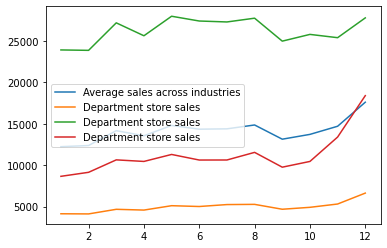

In [10]:
# Create the 1D array avg_monthly_sales
avg_monthly_sales = monthly_sales.mean(axis=1)
print(avg_monthly_sales)

# Plot avg_monthly_sales by month
plt.plot(np.arange(1,13), avg_monthly_sales, label="Average sales across industries")

# Plot department store sales by month
plt.plot(np.arange(1,13), monthly_sales, label="Department store sales")
plt.legend()
plt.show()

[[  4134  23925   8657]
 [  8250  47800  17799]
 [ 12923  74997  28444]
 [ 17503 100634  38900]
 [ 22612 128629  50199]
 [ 27623 156048  60824]
 [ 32868 183353  71454]
 [ 38138 211113  83004]
 [ 42818 236101  92766]
 [ 47731 261903 103222]
 [ 53043 287308 116623]
 [ 59673 315105 135026]]


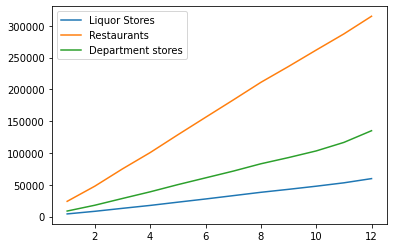

In [11]:
# Find cumulative monthly sales for each industry
cumulative_monthly_industry_sales = monthly_sales.cumsum(axis=0)
print(cumulative_monthly_industry_sales)

# Plot each industry's cumulative sales by month as separate lines
plt.plot(np.arange(1, 13), cumulative_monthly_industry_sales[:,0], label="Liquor Stores")
plt.plot(np.arange(1, 13), cumulative_monthly_industry_sales[:,1], label="Restaurants")
plt.plot(np.arange(1, 13), cumulative_monthly_industry_sales[:,2], label="Department stores")
plt.legend()
plt.show()

In [12]:
# Create an array of tax collected by industry and month
tax_collected = monthly_sales * 0.05
print(tax_collected)

# Create an array of sales revenue plus tax collected by industry and month
total_tax_and_revenue = tax_collected + monthly_sales
print(total_tax_and_revenue)

[[ 206.7  1196.25  432.85]
 [ 205.8  1193.75  457.1 ]
 [ 233.65 1359.85  532.25]
 [ 229.   1281.85  522.8 ]
 [ 255.45 1399.75  564.95]
 [ 250.55 1370.95  531.25]
 [ 262.25 1365.25  531.5 ]
 [ 263.5  1388.    577.5 ]
 [ 234.   1249.4   488.1 ]
 [ 245.65 1290.1   522.8 ]
 [ 265.6  1270.25  670.05]
 [ 331.5  1389.85  920.15]]
[[ 4340.7  25121.25  9089.85]
 [ 4321.8  25068.75  9599.1 ]
 [ 4906.65 28556.85 11177.25]
 [ 4809.   26918.85 10978.8 ]
 [ 5364.45 29394.75 11863.95]
 [ 5261.55 28789.95 11156.25]
 [ 5507.25 28670.25 11161.5 ]
 [ 5533.5  29148.   12127.5 ]
 [ 4914.   26237.4  10250.1 ]
 [ 5158.65 27092.1  10978.8 ]
 [ 5577.6  26675.25 14071.05]
 [ 6961.5  29186.85 19323.15]]


[[ 4051.32 24403.5   8657.  ]
 [ 4116.   24113.75  8867.74]
 [ 4953.38 28012.91 10432.1 ]
 [ 4946.4  25893.37 10246.88]
 [ 5517.72 27435.1  11073.02]
 [ 5512.1  27144.81 10518.75]
 [ 5874.4  27578.05 10630.  ]
 [ 5797.   28315.2  11550.  ]
 [ 5194.8  25237.88  9859.62]
 [ 5306.04 25543.98 10142.32]
 [ 5790.08 25405.   13669.02]
 [ 7491.9  28630.91 18771.06]]


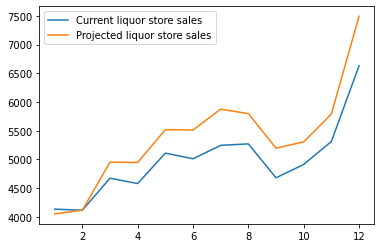

In [14]:
monthly_industry_multipliers = np.array([[0.98, 1.02, 1.  ],
       [1.00, 1.01, 0.97],
       [1.06, 1.03, 0.98],
       [1.08, 1.01, 0.98],
       [1.08, 0.98, 0.98],
       [1.1 , 0.99, 0.99],
       [1.12, 1.01, 1.  ],
       [1.1 , 1.02, 1.  ],
       [1.11, 1.01, 1.01],
       [1.08, 0.99, 0.97],
       [1.09, 1.  , 1.02],
       [1.13, 1.03, 1.02]])

# Create an array of monthly projected sales for all industries
projected_monthly_sales = monthly_sales * monthly_industry_multipliers
print(projected_monthly_sales)

# Graph current liquor store sales and projected liquor store sales by month
plt.plot(np.arange(1,13), monthly_sales[:,0], label="Current liquor store sales")
plt.plot(np.arange(1,13), projected_monthly_sales[:,0], label="Projected liquor store sales")
plt.legend()
plt.show()

In [15]:
names = np.array([["Izzy", "Monica", "Marvin"],
                  ["Weber", "Patel", "Hernandez"]])

# Vectorize the .upper() string method
vectorized_upper = np.vectorize(str.upper)

# Apply vectorized_upper to the names array
uppercase_names = vectorized_upper(names)
print(uppercase_names)

[['IZZY' 'MONICA' 'MARVIN']
 ['WEBER' 'PATEL' 'HERNANDEZ']]


In [19]:

# Convert monthly_growth_rate into a NumPy array
monthly_growth_1D = np.array(monthly_growth_rate)

# Reshape monthly_growth_1D
monthly_growth_2D = monthly_growth_1D.reshape((12, 1))

# Multiply each column in monthly_sales by monthly_growth_2D
print(monthly_growth_2D * monthly_sales)

NameError: ignored

In [20]:
# Find the mean sales projection multiplier for each industry
mean_multipliers = monthly_industry_multipliers.mean(axis=0)
print(mean_multipliers)

# Print the shapes of mean_multipliers and monthly_sales
print(mean_multipliers.shape, monthly_sales.shape)

# Multiply each value by the multiplier for that industry
projected_sales = monthly_sales * mean_multipliers
print(projected_sales)

[1.0775     1.00833333 0.99333333]
(3,) (12, 3)
[[ 4454.385      24124.375       8599.28666667]
 [ 4434.99       24073.95833333  9081.05333333]
 [ 5035.1575     27423.64166667 10574.03333333]
 [ 4934.95       25850.64166667 10386.29333333]
 [ 5504.9475     28228.29166667 11223.67333333]
 [ 5399.3525     27647.49166667 10554.16666667]
 [ 5651.4875     27532.54166667 10559.13333333]
 [ 5678.425      27991.33333333 11473.        ]
 [ 5042.7        25196.23333333  9696.92      ]
 [ 5293.7575     26017.01666667 10386.29333333]
 [ 5723.68       25616.70833333 13311.66      ]
 [ 7143.825      28028.64166667 18280.31333333]]
